<a href="https://colab.research.google.com/github/Thanh0716/Session-5.4-Restaurant-tips-analysis/blob/main/Restaurant_tips_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🍽️ Restaurant Tips Analysis**

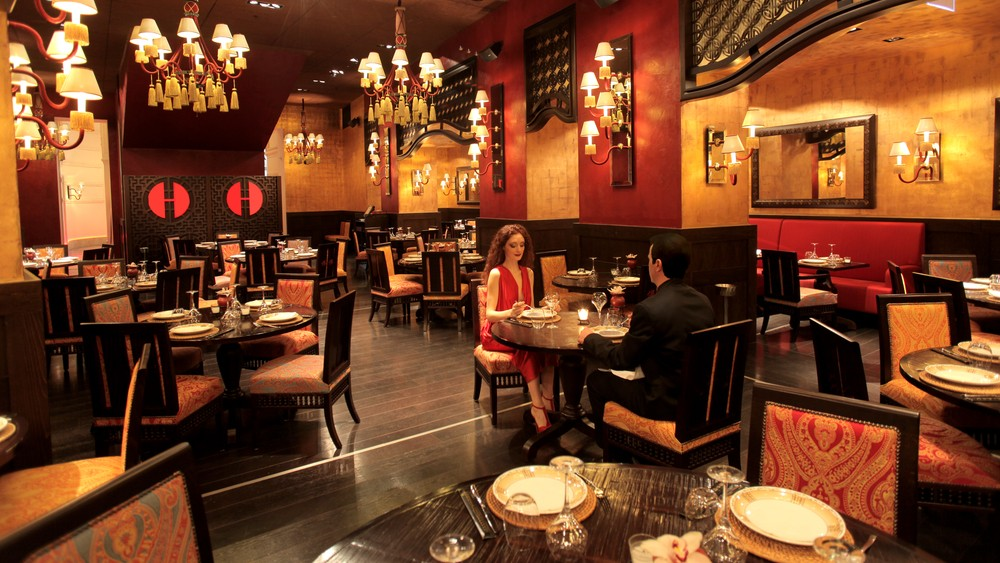

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [ ]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [ ]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
# PUT YOUR CODE HERE
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

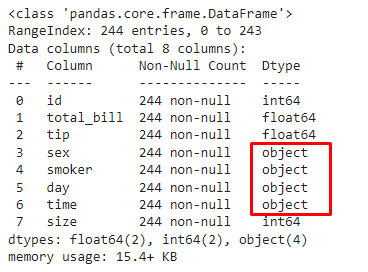

Let's fix their types and make them string:

In [ ]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

Check again (output columns and their types):

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [ ]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
# PUT YOUR CODE HERE
smokers_df = df[df['smoker'] == 'Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
199,199,13.51,2.0,Male,Yes,Thur,Lunch,2
215,215,12.9,1.1,Female,Yes,Sat,Dinner,2
107,107,25.21,4.29,Male,Yes,Sat,Dinner,2
60,60,20.29,3.21,Male,Yes,Sat,Dinner,2
80,80,19.44,3.0,Male,Yes,Thur,Lunch,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df = df[df['smoker'] == 'No']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
146,146,18.64,1.36,Female,No,Thur,Lunch,3
195,195,7.56,1.44,Male,No,Thur,Lunch,2
26,26,13.37,2.0,Male,No,Sat,Dinner,2
28,28,21.7,4.3,Male,No,Sat,Dinner,2
161,161,12.66,2.5,Male,No,Sun,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# YOUR CODE
common_tip_min = df.tip.min()
common_tip_max = df.tip.max()
common_tip_mean = df.tip.mean()
common_tip_median = df.tip.median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
# YOUR CODE
smokers_tip_min = smokers_df.tip.min()
smokers_tip_max = smokers_df.tip.max()
smokers_tip_mean = smokers_df.tip.mean()
smokers_tip_median = smokers_df.tip.median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df.tip.min()
non_smokers_tip_max = non_smokers_df.tip.max()
non_smokers_tip_mean = non_smokers_df.tip.mean()
non_smokers_tip_median = non_smokers_df.tip.median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1
2. Insight 1

**General conclusion:**

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

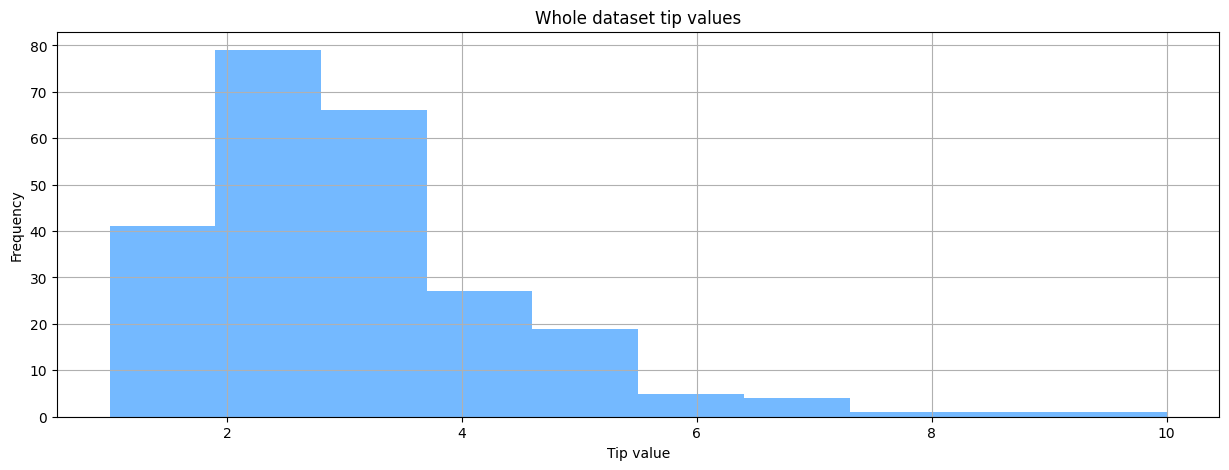

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df.tip, color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

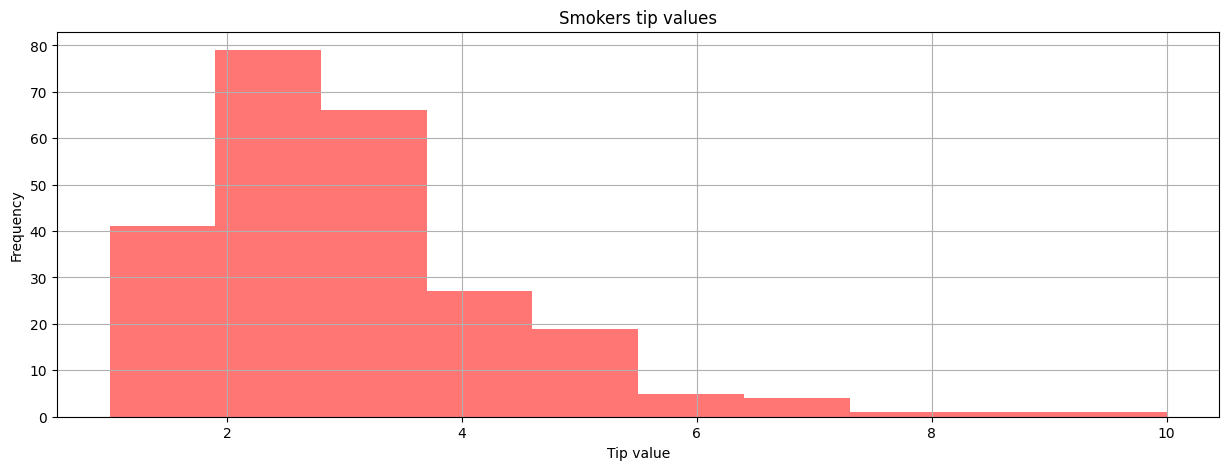

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df.tip, color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

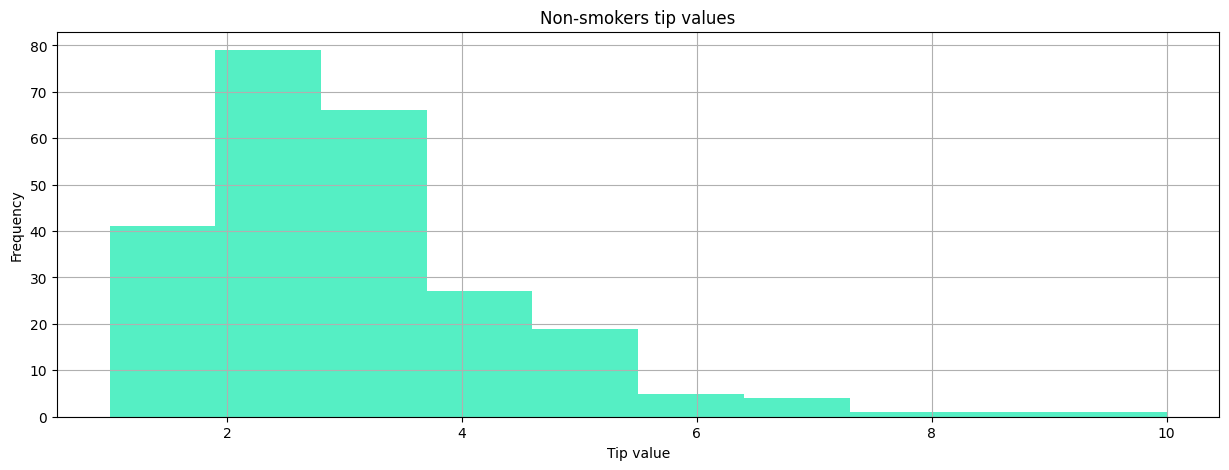

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df.tip, color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

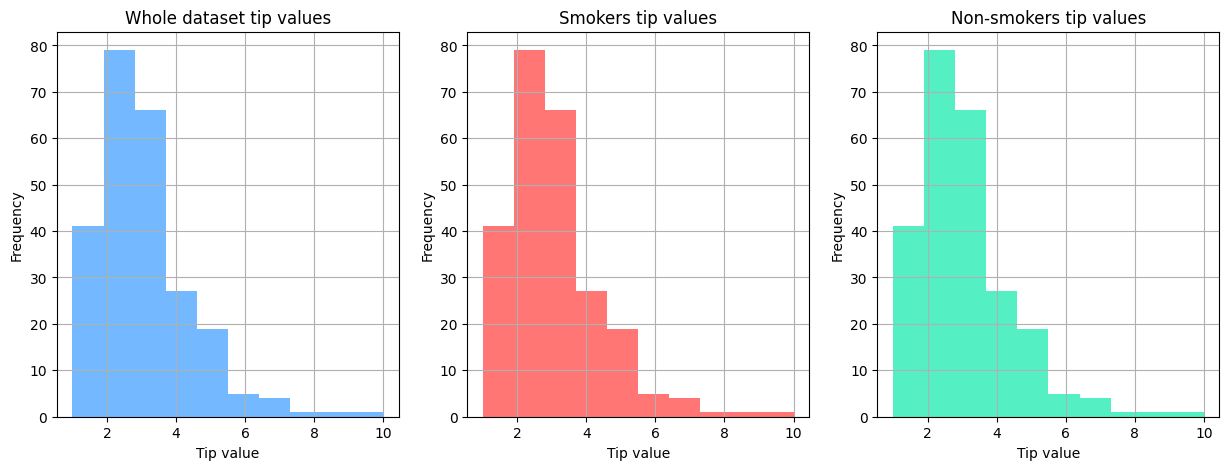

In [ ]:
# YOUR CODE
figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].hist(df.tip, color='#74b9ff')
axis[0].set_xlabel('Tip value')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[1].hist(df.tip, color='#ff7675')
axis[1].set_xlabel('Tip value')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Smokers tip values')
axis[1].grid(True)
axis[2].hist(df.tip, color='#55efc4')
axis[2].set_xlabel('Tip value')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Non-smokers tip values')
axis[2].grid(True)


##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1

**General conclusion:**

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

In [ ]:
Male_df = df[df['sex'] == 'Male']
Female_df = df[df['sex'] == 'Female']

In [ ]:
df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
81,81,16.66,3.4,Male,No,Thur,Lunch,2
142,142,41.19,5.0,Male,No,Thur,Lunch,5
209,209,12.76,2.23,Female,Yes,Sat,Dinner,2
127,127,14.52,2.0,Female,No,Thur,Lunch,2
225,225,16.27,2.5,Female,Yes,Fri,Lunch,2


In [ ]:
Male_tip_min = Male_df.tip.min()
Male_tip_max = Male_df.tip.max()
Male_tip_mean = Male_df.tip.mean()
Male_tip_median = Male_df.tip.median()

# Make a list of values
Male_values = [Male_tip_min, Male_tip_max, Male_tip_mean, Male_tip_median]
# Round all the values to 4 decimal places
Male_values = map(lambda x: round(x, 4), Male_values)
# Make a dataframe from the list
Male_mct = pd.DataFrame(Male_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
Male_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


In [ ]:
Female_tip_min = Female_df.tip.min()
Female_tip_max = Female_df.tip.max()
Female_tip_mean = Female_df.tip.mean()
Female_tip_median = Female_df.tip.median()

# Make a list of values
Female_values = [Female_tip_min, Female_tip_max, Female_tip_mean, Female_tip_median]
# Round all the values to 4 decimal places
Female_values = map(lambda x: round(x, 4), Female_values)
# Make a dataframe from the list
Female_mct = pd.DataFrame(Female_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
Female_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


In [ ]:
all_vals_dict = {
    'Male': {'min': Male_tip_min, 'max': Male_tip_max, 'mean': Male_tip_mean, 'median': Male_tip_median},
    'Female': {'min': Female_tip_min, 'max': Female_tip_max, 'mean': Female_tip_mean, 'median': Female_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Male,Female
min,1.000000,1.000000
max,10.000000,6.500000
mean,3.089618,2.833448
median,3.000000,2.750000


### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

In [ ]:
df['weekend'] = df['day'].isin(['Sun','Sat']).map({True: 'Yes', False: 'No'})
df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size,weekend
152,152,17.26,2.74,Male,No,Sun,Dinner,3,Yes
188,188,18.15,3.5,Female,Yes,Sun,Dinner,3,Yes
3,3,23.68,3.31,Male,No,Sun,Dinner,2,Yes
106,106,20.49,4.06,Male,Yes,Sat,Dinner,2,Yes
217,217,11.59,1.5,Male,Yes,Sat,Dinner,2,Yes


In [ ]:
weekend_counts = df['weekend'].value_counts()
weekend_counts

,count
weekend,
Yes,163
No,81


In [ ]:
tips_yes = df[df['weekend'] == 'Yes']['tip']
weekends_tip_min = tips_yes.min()
weekends_tip_max = tips_yes.max()
weekends_tip_mean = tips_yes.mean()
weekends_tip_median = tips_yes.median()

In [ ]:
# Make a list of values
weekends_values = [weekends_tip_min, weekends_tip_max, weekends_tip_mean, weekends_tip_median]
# Round all the values to 4 decimal places
weekends_values = map(lambda x: round(x, 4), weekends_values)
# Make a dataframe from the list
weekends_mct = pd.DataFrame(weekends_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekends_mct

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


In [ ]:
tips_no = df[df['weekend'] == 'No']['tip']
weekdays_tip_min = tips_no.min()
weekdays_tip_max = tips_no.max()
weekdays_tip_mean = tips_no.mean()
weekdays_tip_median = tips_no.median()

In [ ]:
# Make a list of values
weekdays_values = [weekdays_tip_min, weekdays_tip_max, weekdays_tip_mean, weekdays_tip_median]
# Round all the values to 4 decimal places
weekdays_values = map(lambda x: round(x, 4), weekdays_values)
# Make a dataframe from the list
weekdays_mct = pd.DataFrame(weekdays_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekdays_mct

,0
min,1.0000
max,6.7000
mean,2.7628
median,2.5000


In [ ]:
all_vals_dict = {
    'Weekends': {'min': weekends_tip_min, 'max': weekends_tip_max, 'mean': weekends_tip_mean, 'median': weekends_tip_median},
    'Weekdays': {'min': weekdays_tip_min, 'max': weekdays_tip_max, 'mean': weekdays_tip_mean, 'median': weekdays_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Weekends,Weekdays
min,1.000000,1.00000
max,10.000000,6.70000
mean,3.115276,2.76284
median,3.000000,2.50000


### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

In [ ]:
time_counts = df['time'].value_counts()
time_counts

,count
time,
Dinner,176
Lunch,68


In [ ]:
dinner_df = df[df['time'] == 'Dinner']
dinner_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size,weekend
33,33,20.69,2.45,Female,No,Sat,Dinner,4,Yes
181,181,23.33,5.65,Male,Yes,Sun,Dinner,2,Yes
112,112,38.07,4.0,Male,No,Sun,Dinner,3,Yes
28,28,21.7,4.3,Male,No,Sat,Dinner,2,Yes
158,158,13.39,2.61,Female,No,Sun,Dinner,2,Yes


In [ ]:
dinner_tip_min = dinner_df.tip.min()
dinner_tip_max = dinner_df.tip.max()
dinner_tip_mean = dinner_df.tip.mean()
dinner_tip_median = dinner_df.tip.median()

In [ ]:
# YOUR CODE
# Make a list of values
dinner_values = [dinner_tip_min, dinner_tip_max, dinner_tip_mean, dinner_tip_median]
# Round all the values to 4 decimal places
dinner_values = map(lambda x: round(x, 4), dinner_values)

# Make a dataframe from the list
dinner_mct = pd.DataFrame(dinner_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
dinner_mct

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


In [ ]:
lunch_df = df[df['time'] == 'Lunch']
lunch_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size,weekend
139,139,13.16,2.75,Female,No,Thur,Lunch,2,No
148,148,9.78,1.73,Male,No,Thur,Lunch,2,No
223,223,15.98,3.0,Female,No,Fri,Lunch,3,No
78,78,22.76,3.0,Male,No,Thur,Lunch,2,No
123,123,15.95,2.0,Male,No,Thur,Lunch,2,No


In [ ]:
lunch_tip_min = lunch_df.tip.min()
lunch_tip_max = lunch_df.tip.max()
lunch_tip_mean = lunch_df.tip.mean()
lunch_tip_median = lunch_df.tip.median()

In [ ]:
# YOUR CODE
# Make a list of values
lunch_values = [lunch_tip_min, lunch_tip_max, lunch_tip_mean, lunch_tip_median]
# Round all the values to 4 decimal places
lunch_values = map(lambda x: round(x, 4), lunch_values)

# Make a dataframe from the list
lunch_mct = pd.DataFrame(lunch_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
lunch_mct

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


In [ ]:
all_vals_dict = {
    'Dinners': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median},
    'Lunchs': {'min': lunch_tip_min, 'max': lunch_tip_max, 'mean': lunch_tip_mean, 'median': lunch_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Dinners,Lunchs
min,1.00000,1.250000
max,10.00000,6.700000
mean,3.10267,2.728088
median,3.00000,2.250000
